# Problema 2.3 
### Determinación del tamaño de un PFR

"Elementos de Ingeniería de las reacciones químicas" ,Scott Fogler capitulo 2, página 50

![newnotebook](../imágenes/problema2.3.png)

Primero importaremos la librerías que nos ayudaran a resolver el problema (No olvides activar las librerías con **Shift+enter**):
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [2]:
# Datos
X = np.array([0.0, 0.1, 0.2, 0.4, 0.6, 0.7, 0.8])
Fao_rA = np.array([0.89, 1.08, 1.33, 2.05, 3.54, 5.06, 8.0])

In [3]:
# Cálculos para determinación del área bajo la curva
# Uso de la regla de Simpson
area = simps(y=Fao_rA, x=X, dx=0.00001)

In [19]:
# Delimitación del área sombreada
y0 = np.zeros(len(Fao_rA))

In [20]:
# Datos para el cálculo de volúmen de conversión
V = []
for i in range(1, len(X) + 1):
    V_i = simps(x=X[:i], y=Fao_rA[:i], dx=0.00001)
    V.append(round(V_i, 4) * 1000)


In [21]:
# Cálculos para -rA
Fao = 0.4  # gmol/s
rA = Fao / Fao_rA

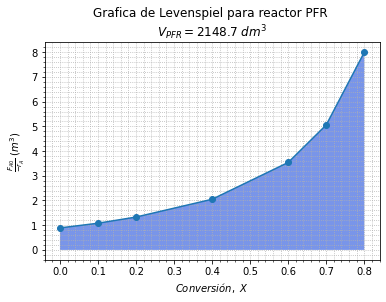

In [13]:
# Gráfica
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.minorticks_on()
ax1.set_xlabel('$Conversión, \\ X$')
ax1.set_ylabel('$\\frac{F_{A0}}{-r_A} \\ \\left( m^3 \\right)$')
ax1.set_title('Grafica de Levenspiel para reactor PFR \n'
              + '$V_{PFR} =$' + str(round(area, 4) * 1000) + ' $dm^3$')
ax1.plot(X, Fao_rA, marker='o')
ax1.fill_between(X, y0, Fao_rA, where=Fao_rA > y0,
                 facecolor='royalblue', alpha=0.7)
ax1.grid(which='BOTH', ls=':')
ax1.grid(True)

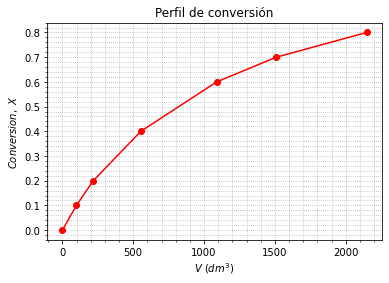

In [14]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.minorticks_on()
ax2.set_ylabel('$Conversion, \\ X$')
ax2.set_xlabel('$V \\ \\left( dm^3 \\right)$')
ax2.set_title('Perfil de conversión')
ax2.plot(V, X, 'r', marker='o')
ax2.grid(which='BOTH', ls=':')
ax2.grid(True)

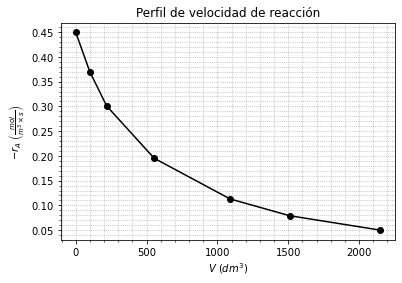

In [15]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.minorticks_on()
ax3.set_ylabel('$-r_A \\ \\left( \\frac{mol}{m^3 \\times s} \\right)$')
ax3.set_xlabel('$V \\ \\left( dm^3 \\right)$')
ax3.set_title('Perfil de velocidad de reacción')
ax3.plot(V, rA, 'black', marker='o')
ax3.grid(which='BOTH', ls=':')
ax3.grid(True)

plt.show()